In [1]:
%ls

 Volume in drive C is OSDisk
 Volume Serial Number is D2FE-3D39

 Directory of C:\Users\haritha.c\Documents\HARITHA\MyEducation\Udemy_courses\work

13-05-2019  13:13    <DIR>          .
13-05-2019  13:13    <DIR>          ..
08-05-2019  10:10    <DIR>          .ipynb_checkpoints
08-05-2019  10:19             4,949 bag of words.ipynb
07-05-2019  21:58         2,587,965 Book2.csv
09-05-2019  22:37            81,974 TFIDF- Kmeans.ipynb
09-05-2019  21:54         2,706,000 TFIDF-Kmeans.csv
07-05-2019  20:39             9,923 time.xlsx
               5 File(s)      5,390,811 bytes
               3 Dir(s)  11,691,282,432 bytes free


In [26]:
conda


NameError: name 'conda' is not defined

In [2]:
import pandas as pd

In [3]:
data_row = pd.read_csv("./Book2.csv")

In [4]:
# data_row.Text.describe


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [112]:
vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
sparse_tfidf_texts  = vectorizer.fit_transform(data_row.Text)

In [113]:
vectorizer.vocabulary_

{'heads built': 48418,
 'capped 10': 16766,
 'day nominated': 28183,
 'subsidising': 113092,
 'different area': 30470,
 'estate leasor': 36620,
 'walks doesn': 126316,
 'beautiful maintained': 12714,
 'agent interested': 5502,
 'tenants bias': 116372,
 'communication application': 21884,
 'significant change': 108860,
 'better attitude': 13369,
 'sold sister': 110079,
 'anonymously': 8386,
 'tenants maximum': 116898,
 'id pressured': 52000,
 'left lawn': 62901,
 'way communicate': 127392,
 'conditioner middle': 23346,
 'tenants argue': 116323,
 'needed smaller': 74286,
 'property mamger': 90549,
 'refuses fixed': 95644,
 'entitlement rental': 35796,
 'towel rails': 120844,
 'form': 43132,
 'investors': 56923,
 'reason near': 94157,
 'charges bank': 18856,
 'chase qcat': 18955,
 'people financially': 82363,
 'rectified timely': 95004,
 'checks tenants': 19238,
 'diligence integrity': 30792,
 'increase sign': 53680,
 'restriction tenant': 103074,
 'house owner': 51054,
 'pets nightmare':

In [114]:
data_row.Text[0]

'estate agents who engaged meaningfully with tenants '

In [115]:
    
print(sparse_tfidf_texts[0])

  (0, 36419)	0.14805259961819198
  (0, 5794)	0.1474032842911718
  (0, 35299)	0.3758409054007995
  (0, 70565)	0.42476907546710513
  (0, 116230)	0.11348966591433118
  (0, 36438)	0.1830310535385218
  (0, 5998)	0.4428270072507742
  (0, 35305)	0.4428270072507742
  (0, 70567)	0.4428270072507742


In [116]:
vectorizer.get_feature_names()[0]

'00'

In [117]:

doc = 0
feature_index = sparse_tfidf_texts[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [sparse_tfidf_texts[doc, x] for x in feature_index])

In [118]:
print(list(tfidf_scores))

[(36419, 0.14805259961819198), (5794, 0.1474032842911718), (35299, 0.3758409054007995), (70565, 0.42476907546710513), (116230, 0.11348966591433118), (36438, 0.1830310535385218), (5998, 0.4428270072507742), (35305, 0.4428270072507742), (70567, 0.4428270072507742)]


In [119]:
for w, s in [(vectorizer.get_feature_names()[i], s) for (i, s) in tfidf_scores]:
  print (w, s)

In [124]:
true_k =4
model = KMeans(n_clusters=true_k, random_state=42,
               init="k-means++",n_init=1 )

In [125]:
model.fit(sparse_tfidf_texts)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [126]:
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

In [127]:
for i in range(true_k):
    print("Cluster" ,i)
    for ind in order_centroids[i, :10]:
        print(terms[ind])

Cluster 0
real
property
estate
real estate
rental
agents
inspections
pet
house
able
Cluster 1
tenants
rent
lease
property
rights
term
longer
tenant
landlords
long
Cluster 2
managers
property managers
property
better
tenants
communication
better property
communication property
owners
managers owners
Cluster 3
pets
allow
allow pets
allowed
pets allowed
allowing
allowing pets
properties
rentals
rental


In [131]:
clusters = model.labels_.tolist()

In [132]:
len(clusters)

15308

In [133]:
data_row['cluster'] = clusters
data_row.head(3)

,Text,cluster,T
0,estate agents who engaged meaningfully with te...,0,"[Estate, agents, who, engaged, meaningfully, w..."
1,a better way to get tenants to pay for the dam...,1,"[A, better, way, to, get, tenants, to, pay, fo..."
2,longer term tenure confirmed at application,1,"[Longer, term, tenure, confirmed, at, applicat..."


In [134]:
data_row.to_csv("TFIDF-Kmeans.csv")

In [21]:
themes = data_row.groupby("cluster")

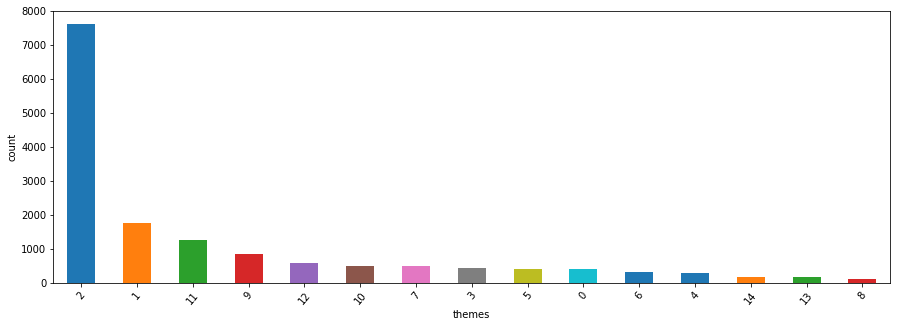

In [22]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(15,5))
themes.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("themes")
plt.ylabel("count")
plt.show()

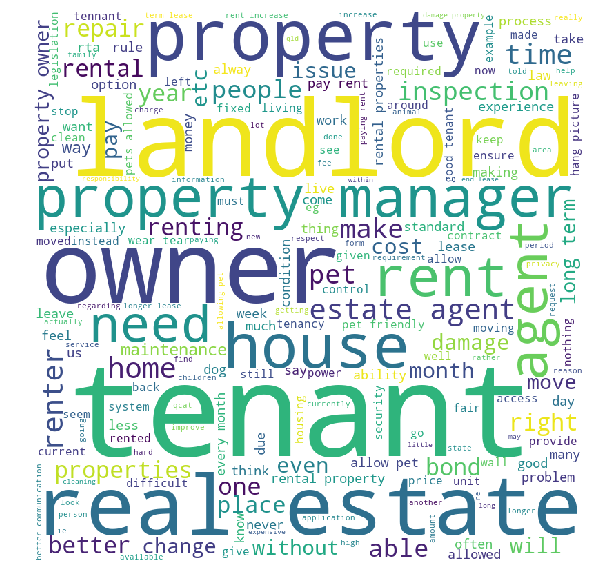

In [89]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df = data_row
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.Text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [95]:
# fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
fig.savefig("InputData_cloud.png")

In [42]:
# cv = CountVectorizer(min_df=0,stop_words="english", max_features=200)
# counts = cv.fit_transform(data_row.Text).toarray().ravel()                                                  
# words = np.array(cv.get_feature_names()) 
# # normalize                                                                                                                                             
# counts = counts / float(counts.max())
# from PIL import Image,ImageDraw
# img_grey = Image.new("L", (5, 5))
# draw = ImageDraw.Draw(img_grey)

In [56]:
# import nltk
# from nltk import word_tokenize
# # data_row['Text'].apply(word_tokenize)

In [82]:
# import string
# data_row.Text = data_row.Text.apply(lambda x: x.lower())
# data_row.Text = data_row.Text.apply(lambda x: x.translate(string.punctuation))
# data_row.Text = data_row.Text.apply(lambda x: x.translate(string.digits))

In [85]:
import csv
from wordcloud import WordCloud


#read first column of csv file to string of words seperated
#by tab
data_row['Text'].dropna(inplace=True)
your_list =(data_row.Text.tolist())
# # # your_list = data_row['Text'].apply(word_tokenize)
# def custom_tokenize(text):
#     if not text:
#         print('The text to be tokenized is a None type. Defaulting to blank string.')
#         text = ''
#     return word_tokenize(your_list)
# # data_row['T'] = data_row.Text.apply(custom_tokenize)
# your_list = custom_tokenize(your_list)
# your_list =data_ro/w.T.tolist()
your_list
# Generate a word cloud image
wordcloud = WordCloud().generate(your_list)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(your_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

In [79]:
your_list

['Estate agents who engaged meaningfully with tenants ',
 'A better way to get tenants to pay for the damage they do to properties.',
 'Longer term tenure confirmed at application',
 'Housing affordability and moving costs',
 'repairs getting done quickly.',
 'Less inspections once you are past an initial probation period\n\nNot including number of children on application (discrimination against families with larger numbers even though it can’t be proved)',
 'More respect for tenants as consumers of a service with rights rather than being treated like second class citizens. Very quick to take my money - slow to respond to concerns (Inc significant safety issues) that would cost the landlord any money.  ',
 'Allowing tenants to have pets. ',
 'There is two. Encourage longer term rentals, ie 3+ Years & make it easier to have pets. ',
 'Flexible fixed term lease periods (most only allow 12 months, and our lives don’t revolve around 12 month periods, forcing us into extremely expensive bre

In [39]:
# !pip install PIL==4.0.0 
# # !pip install --upgrade pip
# # !pip install Pillow
# from PIL import Image

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  ERROR: Could not find a version that satisfies the requirement PIL==4.0.0 (from versions: none)
ERROR: No matching distribution found for PIL==4.0.0


In [ ]:
topics = { 'theme1': 1, 'theme2': 2, 'theme3': 3, 'theme4': 4, 'theme5': 5,"clusters": clusters}

frame = pd.DataFrame(topics,index=[clusters] , columns = ['theme1', 'theme2', 'theme3', 'theme4','theme5'])

In [ ]:
frame.head()

In [ ]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

pos = df.drop("T",axis=1)  # shape (n_components, n_samples)

In [155]:


xs, ys = pos.Text, pos.cluster

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

#set up cluster names using a dict
cluster_names = {0: '0', 
                 1: '1', 
                 2: '2', 
                 3: '3'}
%matplotlib inline
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=pos.cluster, title=pos.Text)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)


C:\Users\haritha.c\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\haritha.c\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


ValueError: 
i think there needs to be accountability to hold the property managers responsible for failure to provide decent living conditions for the tenants. i had a leaking gas tap that leaked for 5 months and i got around $1100 worth of gas bills. my property manager kept saying the owner didn’t want to fix it. there needs to be $$$ aside for these repairs so they can be authorised and fixed. i also think pets should be allowed. within reason of course. not having a great dane in a unit but something like a shih tzu in a unit i see no issue. 
                                                                                                                                                                                                                                                                                                                                    ^
Expected end of text (at char 324), (line:1, col:325)

<Figure size 1224x648 with 1 Axes>

In [151]:
# pos

In [152]:
# df.head()